# Import image

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

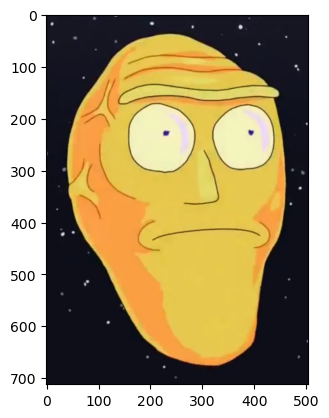

In [2]:
# import and plot chosen image
loc_input_img = os.path.join('..', 'data', 'input', 'showmewhatyougot.png')
image = Image.open(loc_input_img)
np_image = np.array(image)[:, :, :3]
plt.imshow(np_image)
plt.show()

# Square - you will need this function to run any of the other functions below

In [3]:
# function to make image square, padding with minimum values
# make life easier
def make_square(im):
    (a, b) = im.shape[0:2]
    if a > b:
        pad_size = ((0,0),((a-b)//2,(a-b)-((a-b)//2)),(0,0))
    else:
        pad_size = (((b-a)//2,(b-a)-((b-a)//2)),(0,0),(0,0))
    return np.pad(im, pad_size, mode = 'minimum')

(712, 712, 3)


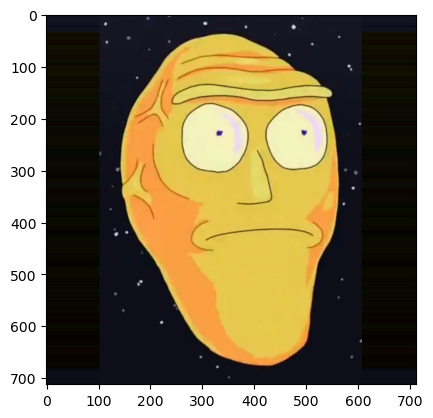

In [4]:
im_square = np_image.copy()
im_square = make_square(im_square)
print(im_square.shape)
plt.imshow(im_square)
plt.show()

# Tiles

In [5]:
# function to tile a floor with image, input length and width
def tile_floor(im, floor_width, floor_length):
    tile_matrix = np.array([[[0 for i in range(1)] for j in range(floor_width)] for k in range(floor_length)])
    floor_size = tile_matrix.shape
    return np.tile(im, floor_size)

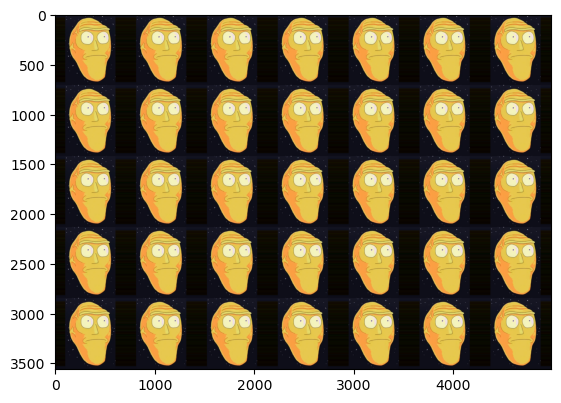

In [6]:
width = 7
length = 5

im_tiles = np_image.copy()
im_tiles = tile_floor(make_square(im_tiles), width, length)
plt.imshow(im_tiles)
plt.show()

# Flips

In [7]:
# function for flips in a grid, input image and (max 10x10) matrix of numbers 0 to 3
# 0 does not flip, 1 flips left-right, 2 flips up-down, 3 flips left-right-up-down
def grid_with_flips(im, matrix):
    
    dict_fun = {
        '0' : make_square(im),
        '1' : np.fliplr(make_square(im)),
        '2' : np.flipud(make_square(im)),
        '3' : np.fliplr(np.flipud(make_square(im)))
    }

    flipped_grid = np.array([])
    for i in range(len(matrix)):
        flipped_row = np.array([])
        for j in matrix[i,:]:
            if flipped_row.size == 0:
                flipped_row = dict_fun[str(j)]
            else:
                flipped_row = np.concatenate([flipped_row, dict_fun[str(j)]], axis = 1)
            
        if flipped_grid.size == 0:
            flipped_grid = flipped_row
        else:
            flipped_grid = np.concatenate([flipped_grid, flipped_row], axis = 0)
    return flipped_grid

[[0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]


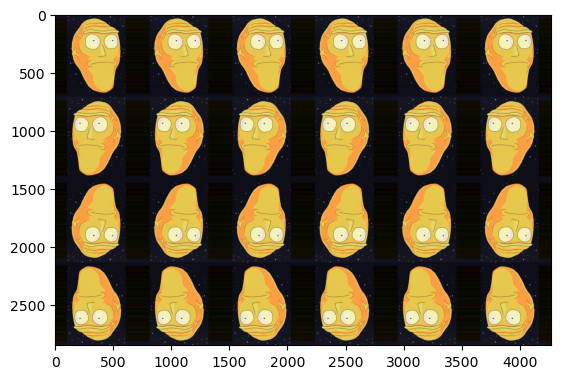

In [8]:
# example with fixed matrix - 0s in the 1st row, 1s in the second, 2s in the 3rd and 3s in the 4th (as project example)

grid_width = 6
grid_length = 4

flip_matrix = np.array([[j for i in range(grid_width)] for j in range(grid_length)])
print(flip_matrix)
flipped = grid_with_flips(np_image.copy(), flip_matrix)
plt.imshow(flipped)
plt.show()

[[0 1 2 2 1 3]
 [0 3 1 0 2 0]
 [2 0 1 2 2 0]
 [3 3 1 3 3 3]]


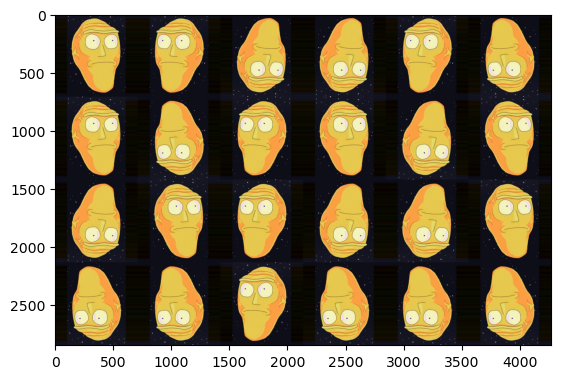

In [9]:
# example with schwifty matrix
grid_width = 6
grid_length = 4
            
flip_matrix =  np.random.randint(0, 4, size = (grid_length, grid_width))
print(flip_matrix)
flipped = grid_with_flips(np_image.copy(), flip_matrix)
plt.imshow(flipped)
plt.show()

# Colors

In [10]:
# function to make image red and scale it ("scale" is the denominater of the scale (1/scale))
def red_resize(im, scale):
    im[:,:,[1,2]] = 0
    im = im[::scale, ::scale]
    return im

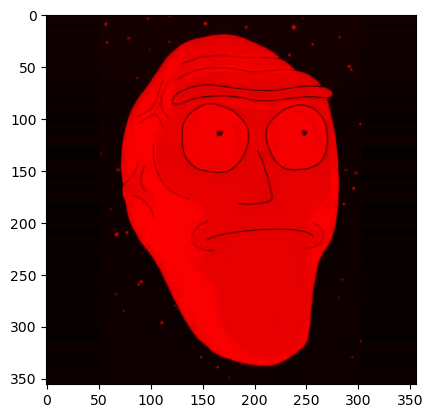

In [11]:
# example
red_im = np_image.copy()
red_im = red_resize(make_square(red_im), 2)
plt.imshow(red_im)
plt.show()

In [12]:
# same for green
def green_resize(im, scale):
    im[:,:,[0,2]] = 0
    im = im[::scale, ::scale]
    return im

In [13]:
# same for blue
def blue_resize(im, scale):
    im[:,:,[0,1]] = 0
    im = im[::scale, ::scale]
    return im

In [14]:
# one function to frame them all
# you will need red, green and blue resize functions and the make_square function
def create_colorful_side(im, colors, scale, dic):

    side = np.array([])
    for i in colors[start:stop:step]:
        if side.size == 0:
            side = dic[i](make_square(im.copy()), scale)
        else:
            side = np.concatenate([side, dic[i](make_square(im.copy()), scale)], axis = axis)

    if ("side" in key) and (side.shape[0] != (make_square(im.copy())).shape[0]):
        side = np.delete(side, np.s_[0: abs(side.shape[0] - (make_square(im.copy())).shape[0])], axis = axis)
    elif ("row" in key) and (side.shape[1] != (make_square(im.copy())).shape[1] + 2*(dic['r'](make_square(im.copy()), scale)).shape[1]):
        side = np.delete(side, np.s_[0: abs(side.shape[1] - ((make_square(im.copy())).shape[1] + 2*(dic['r'](make_square(im.copy()), scale).shape[1])))], axis = axis)
    
    return side

['g', 'b', 'g', 'g', 'b', 'g', 'b', 'b', 'r', 'b', 'g', 'g', 'g', 'g', 'b', 'r', 'g', 'r', 'b', 'r', 'b', 'b', 'g', 'b', 'g', 'r', 'b', 'b']


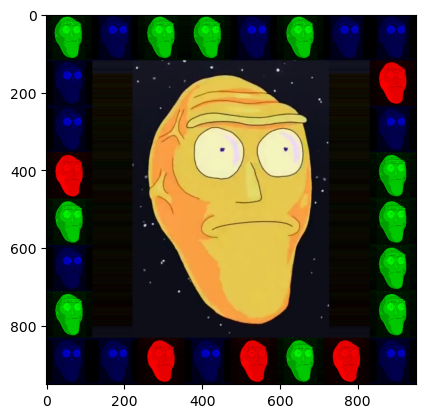

In [15]:
# execute function create_colorful_side
# this code creates a square image framed by colored images according to a random color list that is generated based on the scale
# scale is the factor by which the images in the frame are reduced in size
scale = 6

# a random list of colors is generated
import random

list_length = 4*scale + 4
letters = 'rbg'
colors = random.choices(letters, k = list_length)
print(colors)

# the dictionary for the functions to change color and size
dict_col_fun = {
    'r' : red_resize,
    'b' : blue_resize,
    'g' : green_resize
}

# a dictionary to loop the function over, giving start, stop, step and axis for each side of the frame
square_dict = {
    'side_left': [4*scale + 4, 3*scale + 3, -1, 0],
    'side_right': [scale + 2, 2*scale + 2, 1, 0],
    'toprow' : [0, scale + 2, 1, 1],
    'bottomrow' : [3*scale + 3, 2*scale + 1, -1, 1]
    }

# for loop over square_dict, executing the create_colorful_side function
# input is np_image.copy()
# results in a dictionary
results = {}
for key in square_dict.keys():
    start, stop, step, axis = square_dict.get(key)
    frame = create_colorful_side(np_image.copy(), colors, scale, dict_col_fun)
    results[key] = frame

# concatenate the results
horiz = np.concatenate((results['side_left'], make_square(np_image.copy()), results['side_right']), axis = 1)
big = np.concatenate((results['toprow'], horiz, results['bottomrow']), axis = 0)

plt.imshow(big)
plt.show()

# testbeeld

In [16]:
# function to resize image - input scale is factor by which the image is reduced
def resize_im(im, scale):
    im = im[::scale, ::scale]
    return im

(356, 356, 3)


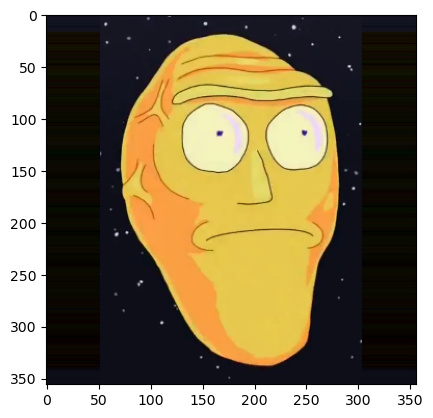

In [17]:
# test resize_im
small_im = np_image.copy()
small_im = resize_im(make_square(small_im), 2)
print(small_im.shape)
plt.imshow(small_im)
plt.show()

In [18]:
# function to create testbeeld - input is image
# you will need resize function, red, green and blue resize functions and the make square function
def create_testbeeld(im):
    # make image square and calculate needed constants
    squ = make_square(im)
    valli = squ.shape[0]
    valpo = round(valli/4)
    
    # create background image
    back = 255 - squ//2

    # resize, slice, color and add center image
    small_im = resize_im(squ.copy(), 2)
    valen = small_im.shape[0]
    im_0, im_1, im_2 = np.array_split(small_im, 3, axis = 1)
    center_im = np.concatenate([red_resize(im_0, 1), green_resize(im_1, 1), blue_resize(im_2, 1)], axis = 1)
    back[valpo:valpo + valen, valpo:valpo + valen] = center_im.copy()
    
    # resize, rotate and add corner images
    very_small_im = resize_im(squ.copy(), 4)
    back[0:valpo, 0:valpo] = very_small_im.copy()
    back[valli - valpo:valli, 0:valpo] = np.rot90(very_small_im.copy(), 1)
    back[valli - valpo:valli, valli - valpo:valli] = np.rot90(very_small_im.copy(), 2)
    back[0:valpo, valli - valpo:valli] = np.rot90(very_small_im.copy(), 3)
    
    
    testbeeld = back
    return testbeeld

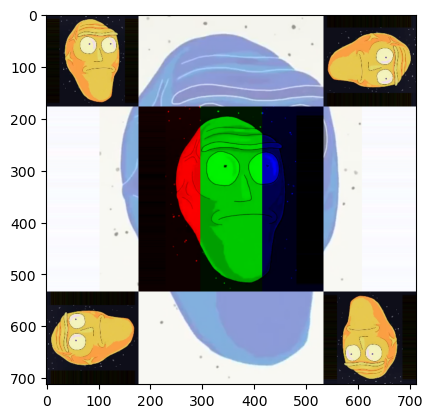

In [19]:
# test
test = np_image.copy()
test = create_testbeeld(test)
plt.imshow(test)
plt.show()

# flag grid

In [20]:
# function to make image magenta and scale it ("scale" is the denominater of the scale (1/scale))
def magenta_resize(im, scale):
    im[:,:,[1]] = 0
    im = im[::scale, ::scale]
    return im

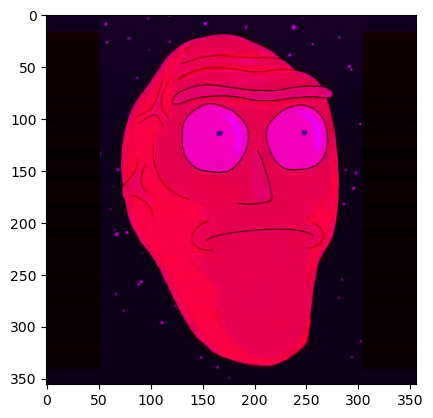

In [21]:
# example
mag_im = np_image.copy()
mag_im = magenta_resize(make_square(mag_im), 2)
plt.imshow(mag_im)
plt.show()

In [22]:
# function to make image yellow and scale it ("scale" is the denominater of the scale (1/scale))
def yellow_resize(im, scale):
    im[:,:,[2]] = 0
    im = im[::scale, ::scale]
    return im

In [23]:
# function to make image cyan and scale it ("scale" is the denominater of the scale (1/scale))
def cyan_resize(im, scale):
    im[:,:,[0]] = 0
    im = im[::scale, ::scale]
    return im

In [24]:
# function to make horizontally spread image
def spread(im, scale):
    im = im[::scale]
    return im

(89, 356, 3)


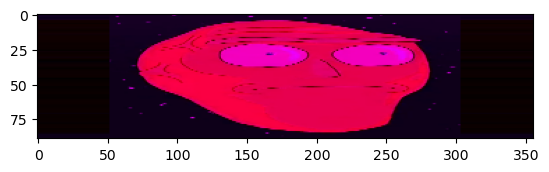

In [25]:
# example
spread_im = mag_im.copy()
spread_im = spread(spread_im, 4)
print(spread_im.shape)
plt.imshow(spread_im)
plt.show()

In [26]:
# design your flag function, input image and a list named "col_combi" with 3 colors (see example)
# you will need the 6 color functions (red, blue, green, magenta, yellow and cyan), the make_square function and the spread function
def design_your_flag_list(im, col_combi):

    dict_more_col_fun = {
        'r' : red_resize,
        'b' : blue_resize,
        'g' : green_resize,
        'm' : magenta_resize,
        'c' : cyan_resize,
        'y' : yellow_resize
    }

    strips = []
    for i in col_combi:
        strip = dict_more_col_fun[i](make_square(im), 2)
        if col_combi.index(i) == 1:
            strip = spread(strip, 3)
        else:
            strip = spread(strip, 6)
        strips.append(strip)
 
    flag = np.concatenate(strips, axis = 0)
    return flag

['r', 'y', 'r']


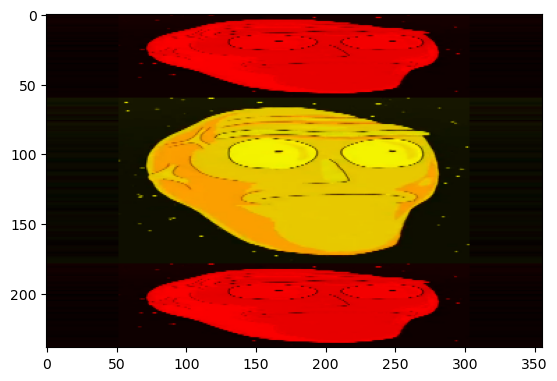

In [27]:
# Spanish example
# col_combi can be any combination of 3 letters from r, g, b, c, m, y in a list
col_combi = ['r', 'y', 'r']
print(col_combi)

flag = design_your_flag_list(np_image.copy(), col_combi)

plt.imshow(flag)
plt.show()

In [28]:
# function to ask for user input
# def input_function():
#     vert = int(input("Enter vertical position of upper left corner of slice"))
#     hor = int(input("Enter horizontal position of upper left corner of slice"))
#     return vert, hor

In [29]:
# function to "zombify" image and cut out a piece
# start_pt is vert, hor; being the vertical and horizontal positions of the upper left corner of the piece you want to cut out
# you will need the make_square function
def zombify(im, start_pt):
    vert, hor = start_pt
    
    zombie = make_square(im)[vert:vert + flag.shape[0], hor:hor + flag.shape[1]]
    zombie = 255 - zombie//3
    return zombie

In [30]:
# user input flag colors function
# def input_col_combi():
#     while True:
#         try:
#             up, mid, down = map(str, input("Enter 3 letters that indicate a color, seperated by a space. Choices are r, g, b, c, y and m.").split())
#         except ValueError:
#             print("3 letters from the given list (r, g, b, c, y, m), seperated with a space, are expected.")
#         else:
#             if up in "rgbcym" and mid in "rgbcym" and down in "rgbcym":
#                 break
#             else:
#                 print("3 letters from the given list (r, g, b, c, y, m), seperated with a space, are expected.")
    
#     col_combi = [up, mid, down]
#     print(col_combi)
#     return col_combi

In [31]:
# function combining the other functions to create flag - zombie grid
# with user input for col_combi and upper left corner of zombie cut-out
# functions you need: zombify, design_your_flag_list, input_function, input_col_combi, the 6 color resize functions, make_square
def flag_zombie_grid(im):
    start_pt = 100, 200
    col_com = ['c', 'y', 'm']
    grid02 = np.concatenate([zombify(im, start_pt), design_your_flag_list(im, col_com), zombify(im, start_pt)], axis = 1)
    grid1 = np.concatenate([design_your_flag_list(im, col_com), zombify(im, start_pt), design_your_flag_list(im, col_com)], axis = 1)
    pretty_grid = np.concatenate([grid02, grid1, grid02], axis = 0)
    return pretty_grid

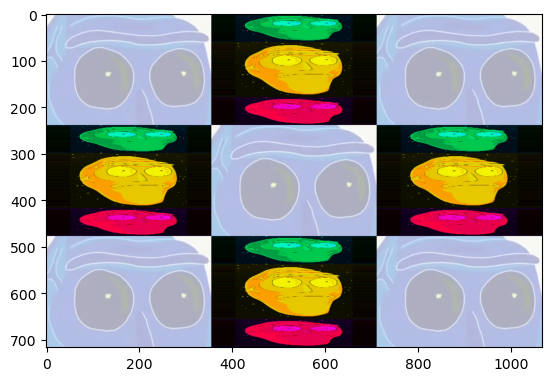

In [32]:
# example
pretty_grid = np_image.copy()
pretty_grid = flag_zombie_grid(pretty_grid)

plt.imshow(pretty_grid)
plt.show()